This is for the distribution moments. It will write a csv 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

df = pd.read_csv('test100.csv')

keys = np.unique(df['current_step'])

for key in keys:
    if key == 0:
        I0 = np.argwhere(df['current_step']==key).squeeze() 
    if key == 1:
        I1 = np.argwhere(df['current_step']==key).squeeze()
    if key == 2:
        I2 = np.argwhere(df['current_step']==key).squeeze()     
    if key == 3:
        I3 = np.argwhere(df['current_step']==key).squeeze()     
    if key == 4:
        I4 = np.argwhere(df['current_step']==key).squeeze()    
    if key == 5: 
        I5 = np.argwhere(df['current_step']==key).squeeze()     
    if key == 6: 
        I6 = np.argwhere(df['current_step']==key).squeeze()
    if key == 7:
        I7 = np.argwhere(df['current_step']==key).squeeze()

period1 = df['system_equity'][I1]
period2 = df['system_equity'][I2]
period3 = df['system_equity'][I3]
period4 = df['system_equity'][I4]
period5 = df['system_equity'][I5]
period6 =  df['system_equity'][I5]
period7 = df['system_equity'][I6]
period8 = df['system_equity'][I7]

list = [period1, period2, period3, period4, period5, period6, period7, period8]


def calc_percentile(array):
    p5 = np.percentile(array, 5) 
    p95 = np.percentile(array, 95)
    pm = np.mean(array)   
    return p5, pm, p95

output = []
for i in list:
    vfunc = np.array(np.array(calc_percentile(i)))
    output.append(vfunc)

print output

df = pd.DataFrame(output)
df.to_csv("1000_moments.csv", index=False, header=False)

# fig = plt.figure()
# ax1 = fig.add_subplot(121)

# for key in keys:    
#     I = np.argwhere(df['current_step']==key).squeeze()

#     ax1.plot(df['current_step'][I], df['system_equity'][I], label="system_Equity")

# plt.show()


# ax1 = fig.add_subplot(121)
# ax1.plot(df['current_step'][I], df['system_Equity'][I], label="system_Equity")
# ax1.set_xlabel('$p$')
# ax1.set_ylabel('$x$')

# nrows=2, ncols=2,
# ax[0,0] top left
# ax[0,1] top right
# ax[row, col]  

    #fig = plt.figure()
#     ax[0].plot(df['current_step'][I], df['system_TAS'][I], label="system_TAS %s"%key)
    
#  ax1 = fig.add_subplot(121)
# ax1.plot(p, data_sorted)
# ax1.set_xlabel('$p$')
# ax1.set_ylabel('$x$')

# ax2 = fig.add_subplot(122)
# ax2.plot(data_sorted, p)
# ax2.set_xlabel('$x$')
# ax2.set_ylabel('$p$')

# plt.show()   

This is for the actual values per shock simulated:

    

In [ ]:
df = pd.read_csv('test1000.csv')

new_df = df[["system_equity", "shock"]].copy()
numpyMatrix = new_df.as_matrix()

df1 = df.pivot(index='current_step', columns='shock', values='system_equity')
# output = []
# for key in keys2:
#     I = np.argwhere(df['shock']==key).squeeze() 
#     output.append(df['system_equity'][I])  
#     print df['system_equity'][I]

#  shock_array = np.array(df['system_equity'][I])
# df = pd.DataFrame(output)
df1.to_csv("1000_hihishocks.csv")

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df3 = pd.read_csv('1000_plot.csv')
import matplotlib as mpl
mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

df4 = df3.loc[ : , '5%': ]

hello


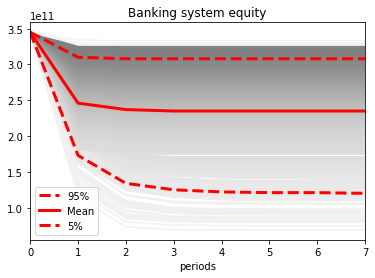

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df3 = pd.read_csv('1000_plot.csv')

df4 = df3.loc[ : , '5%': ]

cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

cmap2 = sns.light_palette("grey", 1000)

col_names=[]
for i in df4.columns:
    col_names.append(str(i))


fig, ax = plt.subplots()

df3.plot(x = "current_step", y=col_names,  color=sns.color_palette(cmap2), ax=ax, legend=False)
df3.plot(x = "current_step", y="95%",  color="r", linewidth=3, ax=ax ,  style='--')
df3.plot(x = "current_step", y="Mean",  color="r", linewidth=3, ax=ax )
df3.plot(x = "current_step", y="5%",  color="r", linewidth=3, style='--', ax=ax, title="Banking system equity" ) 
ax.set_xlabel("periods")
    
# rows = [df4.loc[  : , :label  ] for label in col_names]

print "hello"

plt.show()

fig.savefig('equity_distribution.eps', format='eps', dpi=1000)






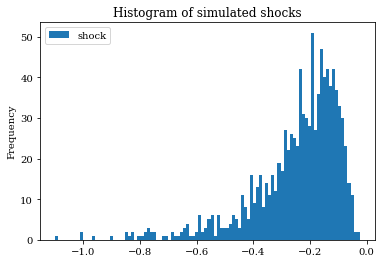

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df4 = pd.read_csv('1000_shocks_plot.csv')
import matplotlib as mpl
mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

fig5 = plt.figure()

df4.plot.hist(df4['shock'], bins=100)

plt.title("Histogram of simulated shocks")


plt.savefig('shocks_1000.eps', format='eps', dpi=1000)

plt.show()

# df4.plot(['shock'])

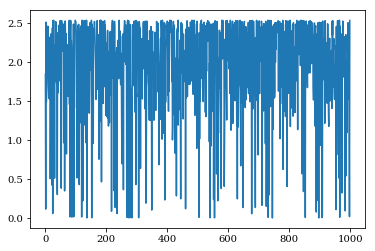

In [39]:

import seaborn as sns
df4 = pd.read_csv('1000_shocks_plot.csv')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})



import scipy as sp
from scipy.stats import lognorm

import numpy as np
import matplotlib.pyplot as plt

Z = np.array(df4['shock'])


shape,loc,scale = lognorm.fit(Z)

pdf = sp.stats.lognorm.pdf(Z, shape, loc, scale)

plt.plot(pdf)

plt.show()
# mu, sigma = 3., 0.6
# mean and standard deviation
# s = np.random.lognormal(mu, sigma, 1000)


#plt.show()

#For cdf
# N = 1000
# # method 1
# H,X1 = np.histogram( Z, bins = 100, normed = True )
# dx = X1[1] - X1[0]
# F1 = np.cumsum(H)*dx

# #method 2
# X2 = np.sort(Z)
# F2 = np.array(range(N))/float(N)

# plt.plot(X1[1:], F1)
# plt.plot(X2, F2)
# plt.show()